# Interactive Plots with ipywidgets

In summary, we will use the `ipywidgets` library to demonstrate how the plot of an [exponentially damped sinusoid](https://en.wikipedia.org/wiki/Damping#Damped_sine_wave) changes as we vary its parameters. Our analysis uses four types of widgets: **IntSlider**, **FloatSlider**, **ColorPicker**, and **Text**.

<br>

## Libraries

In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install ipywidgets

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

import ipywidgets as widgets
from ipywidgets import interactive

<br>

## Default Parameters

In [2]:
%config InlineBackend.figure_format = 'retina'

font_size = 20
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titlesize'] = font_size
plt.rcParams['axes.labelsize'] = font_size
plt.rcParams['xtick.labelsize'] = font_size - 2
plt.rcParams['ytick.labelsize'] = font_size - 2
plt.rcParams['legend.fontsize'] = font_size

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1.5

plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 2

<br>

## Function

We start by defining a Python function describing an exponentially damped sinusoid. The function accepts an array describing the independent variable (`t`) and several parameters that further define the properties of the sinusoid (e.g. amplitude, decay rate, etc.).

The general equation for an exponentially damped sinusoid may be represented as: 

$y(t) = A \cdot e^{- \lambda \cdot t} \cdot cos(\omega \cdot t + \phi)$

where:

- $y(t)$ is the instantenous amplitude at time $t$;
- $A$ is the initial amplitude of the envelope;
- $\lambda$ is the decay rate;
- $\phi$ is the phase angle at $t = 0$;
- $\omega$ is the angular frequency;

([Source](https://en.wikipedia.org/wiki/Damping#Damped_sine_wave))

In [3]:
def damped_sinusoid(t, amp, lambda_, omega, phi, noise_amp):
    noise = amp * 0.01 * np.random.normal(0, noise_amp, len(t))
    return amp * np.exp(-lambda_ * t) * np.cos(omega * t + phi) + noise

<br>

## Static Plot

After defining the function, we proceed in creating a static plot. The term ‘static’ refers to the fact that if we want to update any aspect of the plot (e.g. update the visualised data, or change the plot title), we need to manually tweak the code and rerun the cell.

The code will later be turned into a function that we will use for creating the interactive figure.

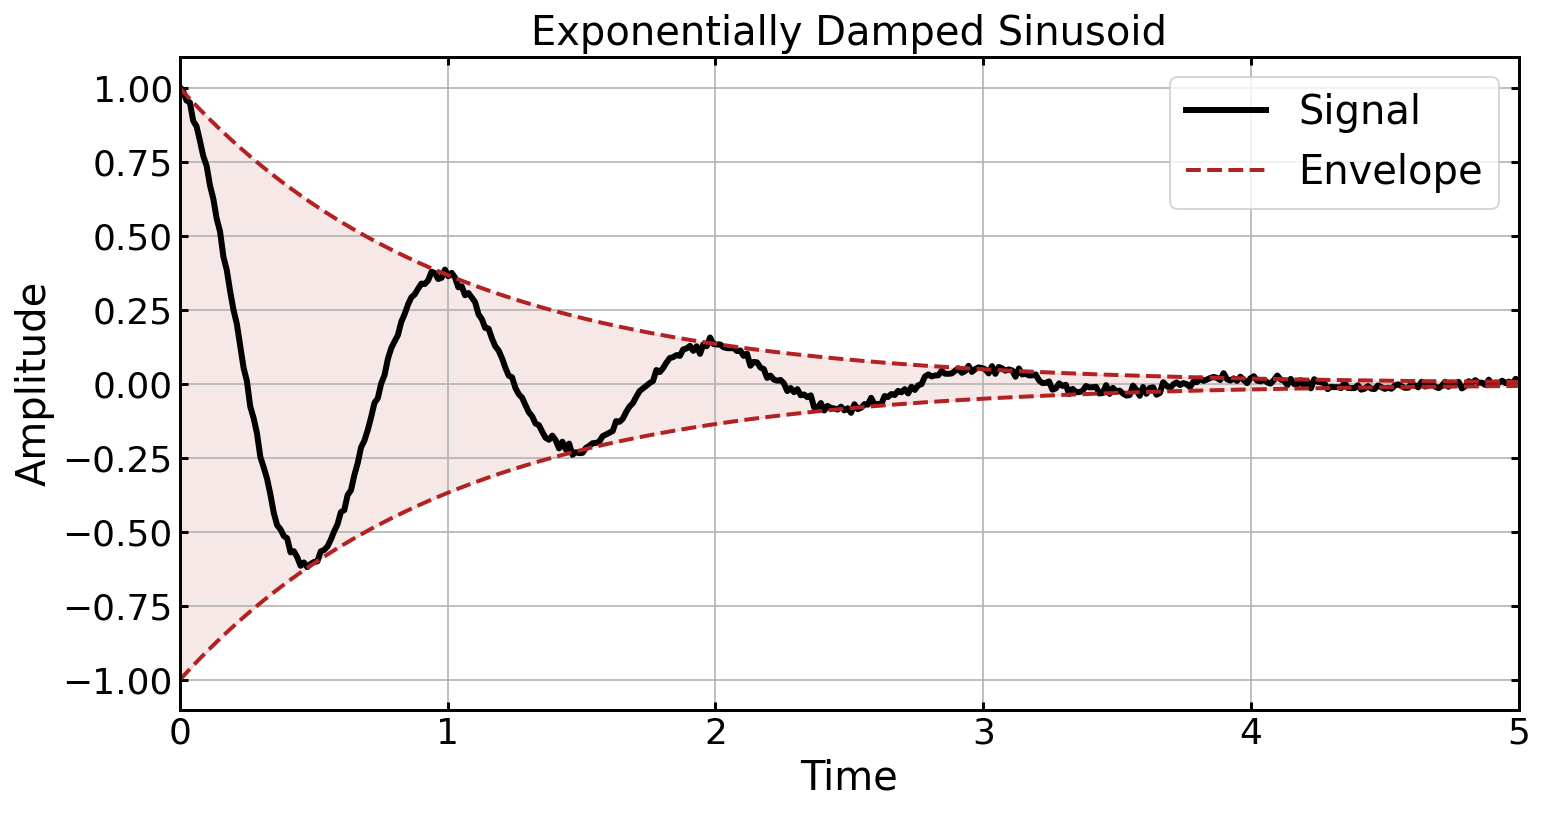

In [4]:
t = np.linspace(0, 5, 400)

amp = 1
lambda_ = 1
omega = 2 * np.pi
phi = 0
noise_amp = 1

y = damped_sinusoid(t, amp, lambda_, omega, phi, noise_amp)
envelope_up = amp * np.exp(-lambda_ * t)
envelope_down = -amp * np.exp(-lambda_ * t)

default_color = 'firebrick'
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t, y, color='black', lw=3, label='Signal')
ax.plot(t, envelope_up, color=default_color, ls='--', label='Envelope')
ax.plot(t, envelope_down, color=default_color, ls='--')

ax.fill_between(t, envelope_up, envelope_down, color=default_color, alpha=0.1)

ax.set(xlabel='Time', ylabel='Amplitude', title='Exponentially Damped Sinusoid')

ax.grid('on')
ax.autoscale(axis='x', tight=True)
ax.legend()

plt.show()

<br>

## Interactive Plot

To use interactive features offered by `ipywidgets`, we need to define a function that we want to explore. In our case, the function will be based on the code used to create a static plot. The function accepts eight arguments: five for defining the damped sinusoid (`amp`, `lambda_`, `omega`, `phi`, and `noise_amp`) and three for tweaking the figure (`plot_color`, `env_color`, and `title`). 

In [5]:
def plot_dampled_sinusoid(amp=1,
                          lambda_=1,
                          omega=2 * np.pi,
                          phi=0,
                          noise_amp=1,
                          plot_color='black',
                          env_color=default_color,
                          title=''):
    y = damped_sinusoid(t, amp, lambda_, omega, phi, noise_amp)
    envelope_up = amp * np.exp(-lambda_ * t)
    envelope_down = -amp * np.exp(-lambda_ * t)

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(t, y, color=plot_color, lw=3, label='Signal')
    ax.plot(t, envelope_up, color=env_color, ls='--', label='Envelope')
    ax.plot(t, envelope_down, color=env_color, ls='--')

    ax.fill_between(t, envelope_up, envelope_down, color=env_color, alpha=0.1)

    ax.set(xlabel='Time', ylabel='Amplitude', title=title)

    ax.grid('on')
    ax.autoscale(axis='x', tight=True)
    ax.legend()

    plt.show()

<br>

Finally, we will use the `interactive` function (`ipywidgets.interactive`), which creates user interface (UI) controls for exploring code and data interactively.

`interactive` works by passing a function to it along with a list of widget objects corresponding to the arguments of the functions. Note that it returns a `Widget` instance rather than immediately displaying the widget. To actually display the widgets, you can use IPython’s `display` function.

In [6]:
interactive_figure = interactive(
    plot_dampled_sinusoid,
    amp=widgets.IntSlider(min=1,
                          max=10,
                          step=1,
                          value=1,
                          description='Amplitude'),
    lambda_=widgets.FloatSlider(min=0,
                                max=10,
                                step=0.2,
                                value=1,
                                description='Decay Rate'),
    omega=widgets.FloatSlider(min=np.pi,
                              max=3 * np.pi,
                              step=np.pi / 10,
                              value=2 * np.pi,
                              description='Ang. Freq.'),
    phi=widgets.FloatSlider(min=-4 * np.pi,
                            max=+4 * np.pi,
                            step=np.pi / 10,
                            value=0,
                            description='Phase'),
    noise_amp=widgets.FloatSlider(min=0,
                                  max=50,
                                  step=1,
                                  value=1,
                                  description='Noise'),
    plot_color=widgets.ColorPicker(concise=False,
                                   value='Black',
                                   description='Signal Color',
                                   disabled=False),
    env_color=widgets.ColorPicker(concise=False,
                                  value='Firebrick',
                                  description='Env. Color',
                                  disabled=False),
    title=widgets.Text(description='Title',
                       value='Exponentially Damped Sinusoid',
                       disabled=False))

display(interactive_figure)

interactive(children=(IntSlider(value=1, description='Amplitude', max=10, min=1), FloatSlider(value=1.0, descr…

<br>